In [33]:
# Setup Env 
# conda create -n titanicsurvivalprediction python=3.8
#conda activate titanicsurvivalprediction

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv',na_values='NA')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
dataset=df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']]

In [6]:
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C


In [7]:
print(dataset['Sex'].unique())
print(dataset['Parch'].unique())
print(dataset['Embarked'].unique())
print(dataset['Cabin'].unique())

['male' 'female']
[0 1 2 5 3 4 6]
['S' 'C' 'Q' nan]
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42'

In [8]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
len(dataset)

891

In [10]:
dataset['Cabin'].fillna('Unknown',inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2448\2063801995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cabin'].fillna('Unknown',inplace=True)


In [11]:
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C


In [12]:
dataset.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      2
dtype: int64

In [13]:
dataset.loc[dataset['Age'].isnull()].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
5,0,3,male,NaN,0,0,8.4583,Unknown,Q
17,1,2,male,NaN,0,0,13.0000,Unknown,S
19,1,3,female,NaN,0,0,7.2250,Unknown,C
26,0,3,male,NaN,0,0,7.2250,Unknown,C
28,1,3,female,NaN,0,0,7.8792,Unknown,Q


In [14]:
mean_Adult=df.loc[~(df['SibSp'].isnull()) & (df['SibSp']==0) & (df['Parch']==0),'Age'].mean()
mean_Child=df.loc[~(df['SibSp'].isnull()) & (df['SibSp']>0) | (df['Parch']>0),'Age'].mean()

In [15]:
print("Mean of Adult is {} and Child is {}".format(mean_Adult,mean_Child))

Mean of Adult is 32.22029702970297 and Child is 26.413451612903227


In [16]:
dataset.loc[df['Age'].isnull() & (df['SibSp']==0) & (df['Parch']==0),'Age']=mean_Adult

In [17]:
dataset.loc[df['Age'].isnull() & (df['SibSp']>0) | (df['Parch']>0),'Age']=mean_Child

In [18]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [19]:
len(dataset)

891

In [20]:
dataset['Embarked'].fillna('Unknown',inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2448\2918969670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Embarked'].fillna('Unknown',inplace=True)


In [21]:
len(dataset)

891

In [22]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,Unknown,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,Unknown,S


In [23]:
dataset.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.035562,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.291553,0.083081,0.018443,-0.549500
Age,-0.035562,-0.291553,1.000000,-0.125673,-0.202023,0.017925
SibSp,-0.035322,0.083081,-0.125673,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.202023,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.017925,0.159651,0.216225,1.000000


In [24]:
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C


In [25]:
unique_Sex=list(dataset['Sex'].unique())
unique_Cabin=list(dataset['Cabin'].unique())
unique_Embarked=list(dataset['Embarked'].unique())


In [26]:
dataset['Sex']=dataset['Sex'].map(lambda x : unique_Sex.index(x))
dataset['Cabin']=dataset['Cabin'].map(lambda x : unique_Cabin.index(x))
dataset['Embarked']=dataset['Embarked'].map(lambda x : unique_Embarked.index(x))


C:\Users\Hp\AppData\Local\Temp\ipykernel_2448\4160880178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sex']=dataset['Sex'].map(lambda x : unique_Sex.index(x))
C:\Users\Hp\AppData\Local\Temp\ipykernel_2448\4160880178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cabin']=dataset['Cabin'].map(lambda x : unique_Cabin.index(x))
C:\Users\Hp\AppData\Local\Temp\ipykernel_2448\4160880178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [27]:
dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
dataset.drop(['SibSp','Parch'],axis=1,inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2448\1284407741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1
C:\Users\Hp\AppData\Local\Temp\ipykernel_2448\1284407741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(['SibSp','Parch'],axis=1,inplace=True)


In [28]:
X=dataset.iloc[:,1:]
y=dataset.iloc[:,0]

In [29]:
X.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize
0,3,0,22.0,7.2500,0,0,2
1,1,1,38.0,71.2833,1,1,2
2,3,1,26.0,7.9250,0,0,1
3,1,1,35.0,53.1000,2,0,2
4,3,0,35.0,8.0500,0,0,1


In [30]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.22)

In [33]:
print("Length of X train {} X test {}  Y train  {}  Y test {} ".format(len(x_train),len(x_test),len(y_train),len(y_test)))

Length of X train 694 X test 197  Y train  694  Y test 197 


In [34]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [35]:
print(model.feature_importances_)

[0.0986081  0.31294865 0.16485356 0.23910268 0.08073135 0.03794003
 0.06581563]


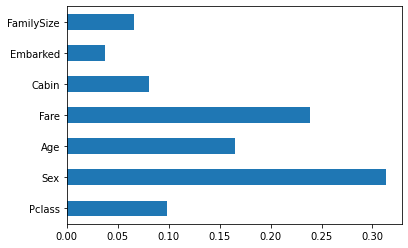

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

feat_importance=pd.Series(model.feature_importances_,index=X.columns)
feat_importance.plot(kind='barh')
plt.show()

In [37]:
from sklearn.ensemble import RandomForestClassifier

base_model = RandomForestClassifier(n_estimators=100)
base_model.fit(x_train, y_train)

RandomForestClassifier()

In [89]:
test_data=pd.read_csv('test.csv')
res_data=test_data

In [90]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [91]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [92]:
test_data=test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
        'Fare', 'Cabin', 'Embarked']]

In [93]:
test_data.isnull().sum()
test_data['Cabin'].fillna('Unknown',inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2448\656902632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Cabin'].fillna('Unknown',inplace=True)


In [94]:
test_data['Sex']=test_data['Sex'].map(lambda x : unique_Sex.index(x))
test_data['Cabin']=test_data['Cabin'].map(lambda x : unique_Cabin.index(x) if (unique_Cabin.count(x)>0) else unique_Cabin.index('Unknown'))
test_data['Embarked']=test_data['Embarked'].map(lambda x : unique_Embarked.index(x))

C:\Users\Hp\AppData\Local\Temp\ipykernel_2448\3119053988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Sex']=test_data['Sex'].map(lambda x : unique_Sex.index(x))
C:\Users\Hp\AppData\Local\Temp\ipykernel_2448\3119053988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Cabin']=test_data['Cabin'].map(lambda x : unique_Cabin.index(x) if (unique_Cabin.count(x)>0) else unique_Cabin.index('Unknown'))
C:\Users\Hp\AppData\Local\Temp\ipykernel_2448\3119053988.py:3: SettingWithCopyWarnin

In [95]:

test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,0,34.5,0,0,7.8292,0,2
1,3,1,47.0,1,0,7.0000,0,0
2,2,0,62.0,0,0,9.6875,0,2
3,3,0,27.0,0,0,8.6625,0,0
4,3,1,22.0,1,1,12.2875,0,0


In [96]:
mean_Adult=test_data.loc[~(test_data['SibSp'].isnull()) & (test_data['SibSp']==0) & (test_data['Parch']==0),'Age'].mean()
mean_Child=test_data.loc[~(test_data['SibSp'].isnull()) & (test_data['SibSp']>0) | (test_data['Parch']>0),'Age'].mean()


test_data.loc[test_data['Age'].isnull() & (test_data['SibSp']>0) | (test_data['Parch']>0),'Age']=mean_Child
test_data.loc[test_data['Age'].isnull() & (test_data['SibSp']==0) & (test_data['Parch']==0),'Age']=mean_Adult

In [97]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Cabin       0
Embarked    0
dtype: int64

In [98]:
test_data.fillna(test_data['Fare'].mean(),inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2448\3019302626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.fillna(test_data['Fare'].mean(),inplace=True)


In [99]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [100]:
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1
test_data.drop(['SibSp','Parch'],axis=1,inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_2448\3033433945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1
C:\Users\Hp\AppData\Local\Temp\ipykernel_2448\3033433945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['SibSp','Parch'],axis=1,inplace=True)


In [101]:
predict_result=base_model.predict(test_data)

In [102]:
ans=[]
for i,j in zip(predict_result,list(res_data['PassengerId'])):
    if int(i) > 0:
        ans.append(1)
    elif int(i)<=0:
        ans.append(0)

In [104]:
df = pd.DataFrame({
                    'PassengerId': list(res_data['PassengerId']),
                    'Survived': list(ans) 
                  })

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('output_Random_Forest.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='gender_submission', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()